原始数据集部分数据：
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



编码后的数据集：
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0          1.0       0.0     3.0  22.0    1.0    0.0   7.2500   
1          2.0       1.0     1.0  38.0    1.0    0.0  71.2833   
2          3.0       1.0     3.0  26.0    0.0    0.0   7.9250   
3          4.0       1.0     1.0  35.0    1.0    0.0  53.1000   
4          5.0       0.0     3.0  35.0    0.0    0.0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                               0.0                                    0.0   
1                               0.0                                    0.0   
2                               0.0                                    0.0   
3                               0.0                                    0.0   
4                               0.0                                    0.0   

   Name_Abelson, Mr. Samuel  ...  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0                       0.0  ...          0.0          0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

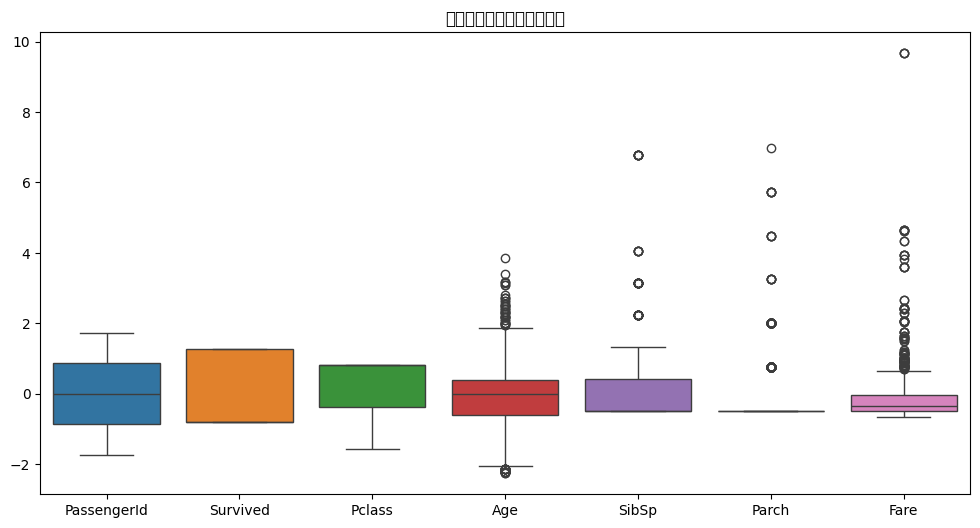

In [1]:
# 在Colab中运行此代码
# 首先，安装必要的库
!pip install pandas matplotlib seaborn scikit-learn

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 选择Titanic数据集
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# 显示部分数据
print("原始数据集部分数据：")
print(data.head())

# 1. 处理数据中的缺失值
# 计算缺失值数量
missing_values = data.isnull().sum()
print("\n数据集中缺失值数量：")
print(missing_values)

# 使用均值填充数值型缺失值，使用众数填充类别型缺失值
numeric_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[object]).columns

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

data[numeric_features] = imputer_numeric.fit_transform(data[numeric_features])
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

print("\n缺失值处理后的数据集：")
print(data.head())

# 2. 对类别型特征进行编码
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = pd.DataFrame(encoder.fit_transform(data[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# 合并编码后的数据
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_categorical], axis=1)

print("\n编码后的数据集：")
print(data.head())

# 3. 对数值型特征进行归一化
scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(data[numeric_features]), columns=numeric_features)

# 合并归一化后的数据
data[numeric_features] = scaled_numeric

print("\n归一化后的数据集：")
print(data.head())

# 生成图片结果
# 绘制数值型特征的分布图
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_features])
plt.title("归一化后的数值型特征分布")
plt.show()
